''' The attributes of the data was chenged for security purposes.
    class distribution:
    class 0: 99.83%
    class 1: 0.17%
    missing attributes = 0'''


In [1]:
pip install eli5

In [2]:
#import the required libraries!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Additional libraries (Different from the original code)
from sklearn.preprocessing import LabelEncoder

In [4]:
#creating a function to plot confusion and precision matrix
def confusion_precision_plot(actual_data, predicted_data):
    c = confusion_matrix(actual_data, predicted_data)
    labels=[0,1]
    print('Confusion Plot :')
    plt.figure(figsize=[13,10])
    sns.heatmap(c, annot=True,fmt='0.2f', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted class')
    plt.ylabel('Actual class')
    plt.show()
    b = (c/c.sum(axis=0))
    print('Precision Plot :')
    plt.figure(figsize=[13,10])
    sns.heatmap(b, annot=True, xticklabels = labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Actual class')
    plt.show()
#creating a function to show permutation importance
def perm_imp(xtest, ytest, model):
    perm = PermutationImportance(model).fit(xtest,ytest)
    return eli5.show_weights(perm, feature_names = xtest.columns.tolist())


In [5]:
#loading the dataset to df
df = pd.read_csv(r"fraudTest.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [6]:
#Additional Preprocessing
cat_features = ["trans_date_trans_time", "merchant", "category", "first", "last", "gender", "street", "city", "state", "job", "dob", "trans_num"]

le = LabelEncoder()

for feature in cat_features:
  label = le.fit_transform(df[feature])
  df.drop(feature, axis = 1, inplace = True)
  df[feature] = label

df

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,...,category,first,last,gender,street,city,state,job,dob,trans_num
0,0,2291163933867244,2.86,29209,33.9659,-80.9355,333497,1371816865,33.986391,-81.200714,...,10,151,115,1,341,157,39,275,376,98699
1,1,3573030041201292,29.84,84002,40.3207,-110.4360,302,1371816873,39.450498,-109.960431,...,10,163,457,0,354,16,43,392,760,108785
2,2,3598215285024754,41.28,11710,40.6729,-73.5365,34496,1371816893,40.495810,-74.196111,...,5,24,249,0,865,61,33,259,421,433979
3,3,3591919803438423,60.05,32780,28.5697,-80.8191,54767,1371816915,28.812398,-80.883061,...,9,42,457,1,320,764,8,407,718,71993
4,4,3526826139003047,3.19,49632,44.2529,-85.0170,1126,1371816917,44.959148,-85.884734,...,13,247,261,1,548,247,21,196,177,190585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,30560609640617,43.77,63453,40.4931,-91.8912,519,1388534347,39.946837,-91.333331,...,5,235,315,1,531,443,23,460,334,336391
555715,555715,3556613125071656,111.84,77566,29.0393,-95.4401,28739,1388534349,29.661049,-96.186633,...,7,171,424,1,540,401,42,198,890,70372
555716,555716,6011724471098086,86.88,99323,46.1966,-118.9017,3684,1388534355,46.658340,-119.715054,...,7,18,239,0,126,104,46,294,609,235088
555717,555717,4079773899158,7.99,83643,44.6255,-116.4493,129,1388534364,44.470525,-117.080888,...,13,111,342,1,663,476,12,58,331,43546


In [7]:
#seperating dependent attributes from independent attributes
x = df.drop(['is_fraud'], axis=1)
y=df.is_fraud
#splitting the data set into three parts: train data, test data, cross-valid data.
Xtrain, x_test, Ytrain, y_test =train_test_split(x, y, test_size=0.2, random_state=2)
x_train, x_cv, y_train, y_cv =train_test_split(Xtrain, Ytrain, test_size=0.2, random_state=2)
print('Rows in Train data : ', x_train.shape[0])
print('Rows in Test data : ',x_test.shape[0])
print('Rows in cv data : ',x_cv.shape[0])

Rows in Train data :  355660
Rows in Test data :  111144
Rows in cv data :  88915


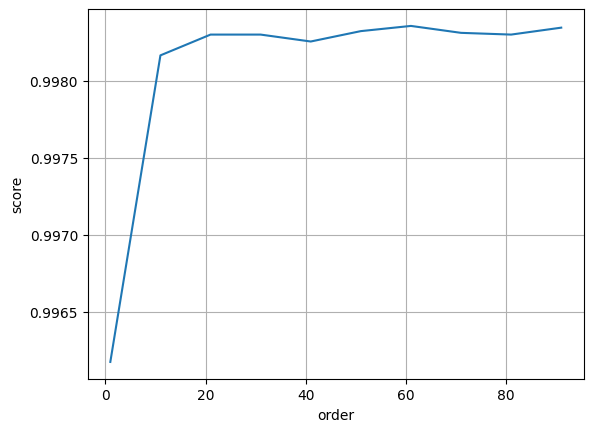

In [8]:
order=[x for x in range(1,100,10)]
rsqu=[]
for x in order:
    rfc=RandomForestClassifier(n_estimators=x).fit(x_train,y_train)
    rsqu.append(rfc.score(x_cv,y_cv))
plt.plot(order,rsqu)
plt.grid()
plt.xlabel('order')
plt.ylabel('score')
plt.show()

In [9]:
rfc=RandomForestClassifier(n_estimators=15).fit(x_train,y_train)
print(rfc.score(x_cv, y_cv))
predict_rfc = rfc.predict(x_cv)
print(classification_report(y_cv, predict_rfc))

0.9981555418095934
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     88556
           1       0.93      0.58      0.72       359

    accuracy                           1.00     88915
   macro avg       0.97      0.79      0.86     88915
weighted avg       1.00      1.00      1.00     88915



Confusion Plot :


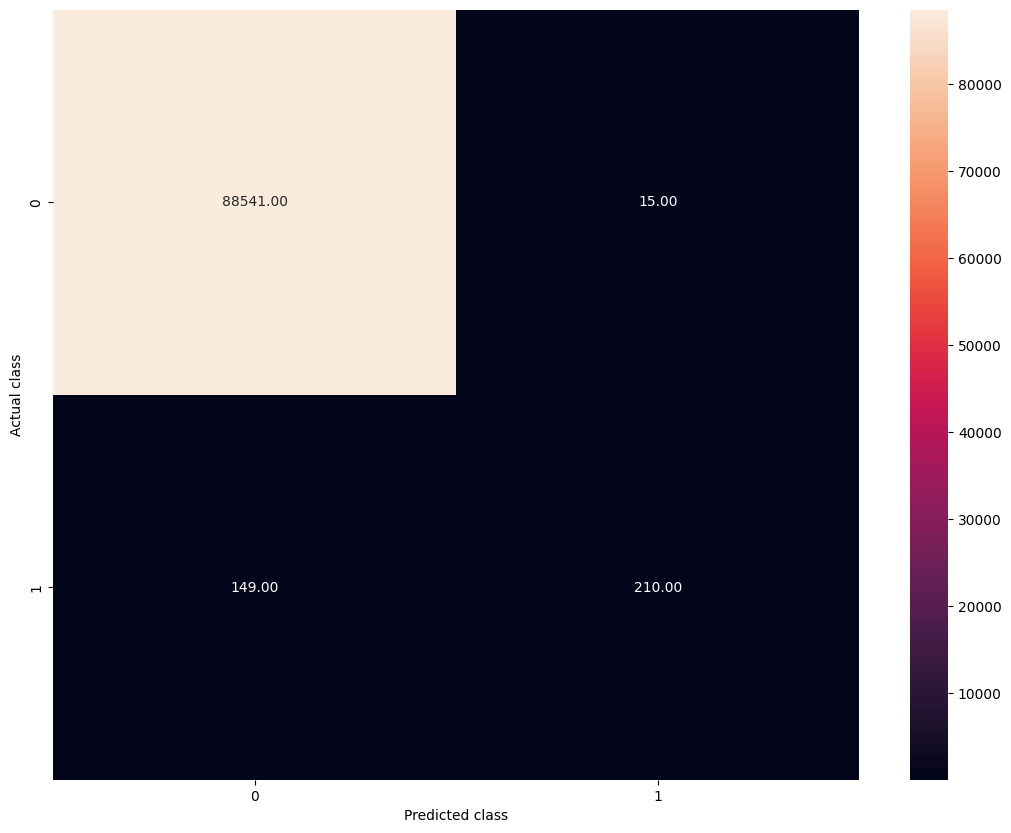

Precision Plot :


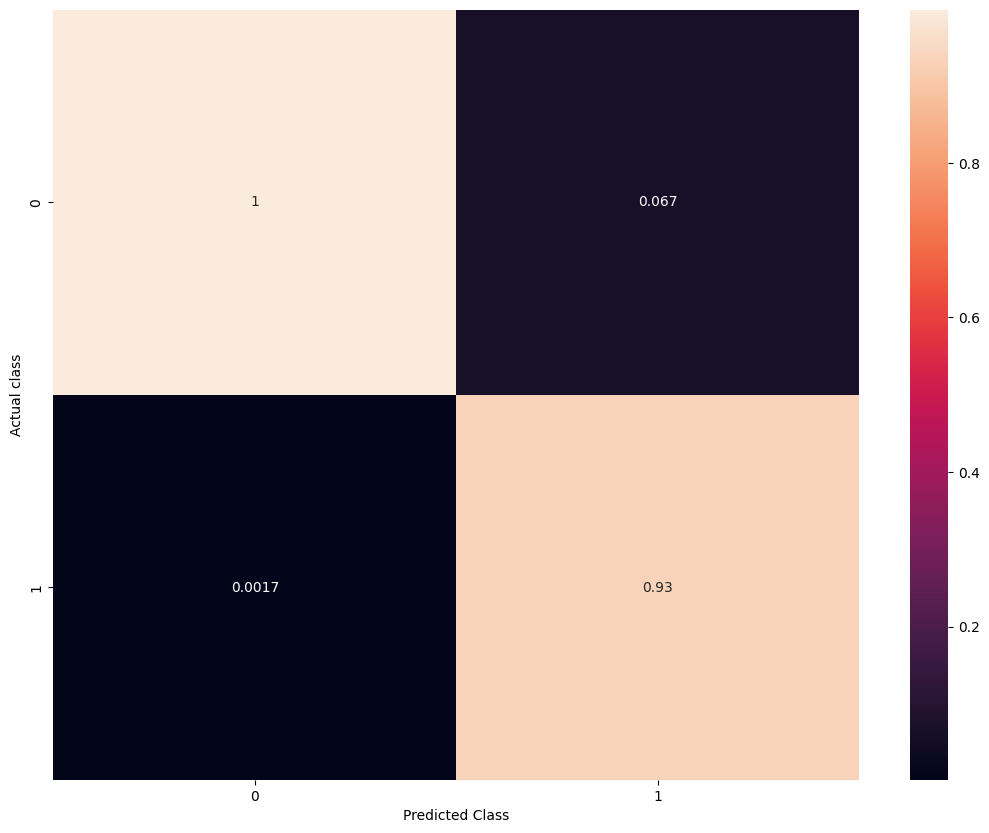

In [10]:
confusion_precision_plot(y_cv, predict_rfc)

In [11]:
perm_imp(x_cv,y_cv,rfc)

Weight,Feature
0.0037 ± 0.0002,amt
0.0018 ± 0.0001,category
0.0005 ± 0.0001,Unnamed: 0
0.0003 ± 0.0001,dob
0.0002 ± 0.0001,zip
0.0002 ± 0.0001,first
0.0002 ± 0.0001,lat
0.0002 ± 0.0001,city_pop
0.0002 ± 0.0001,city
0.0002 ± 0.0001,unix_time


# Using logistic regression

In [12]:
lr = LogisticRegression().fit(x_train,y_train)
print('Accuracy score : ',lr.score(x_cv, y_cv))
predict_lr = lr.predict(x_cv)
print(classification_report(y_cv, predict_lr))

Accuracy score :  0.9959624360344149
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     88556
           1       0.00      0.00      0.00       359

    accuracy                           1.00     88915
   macro avg       0.50      0.50      0.50     88915
weighted avg       0.99      1.00      0.99     88915



Confusion Plot :


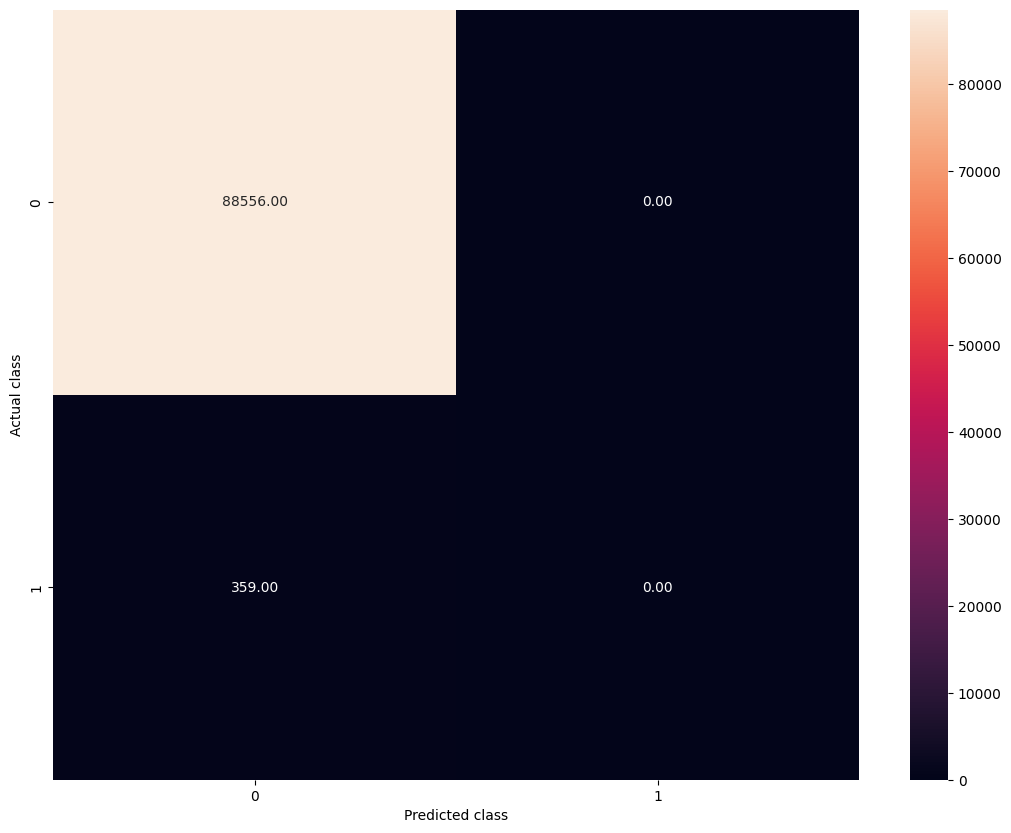

Precision Plot :


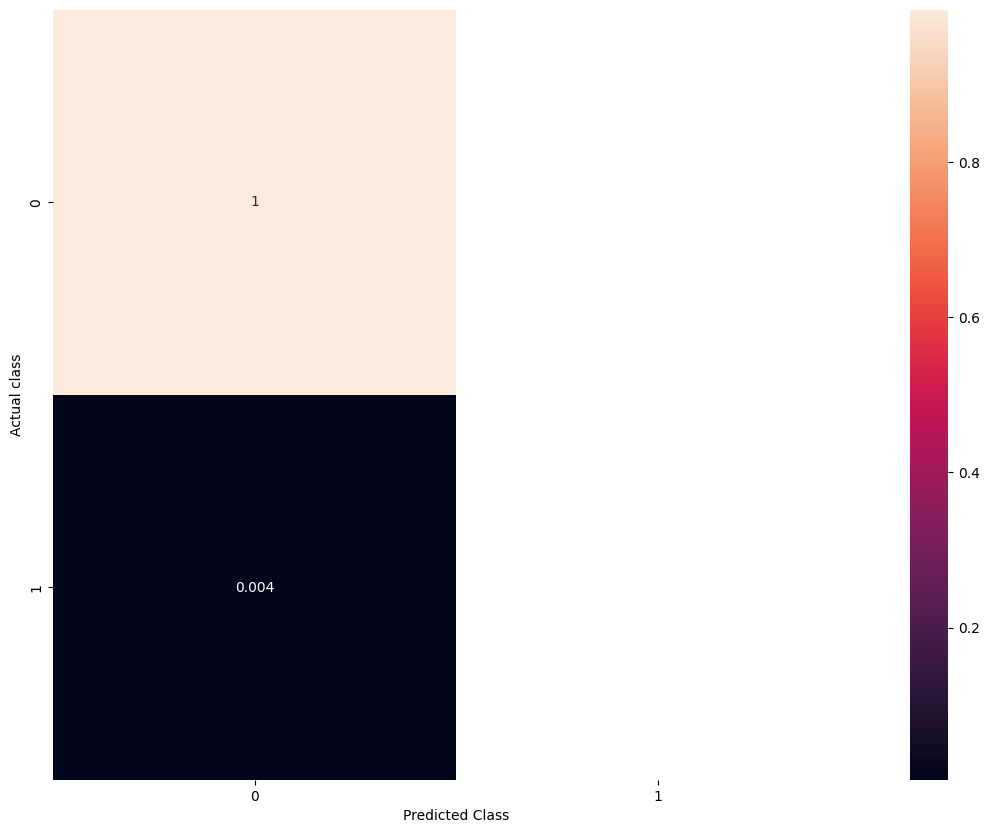

In [13]:
confusion_precision_plot(y_cv, predict_lr)

In [14]:
perm_imp(x_cv,y_cv,lr)

Weight,Feature
0 ± 0.0000,amt
0 ± 0.0000,job
0 ± 0.0000,state
0 ± 0.0000,city
0 ± 0.0000,street
0 ± 0.0000,gender
0 ± 0.0000,last
0 ± 0.0000,first
0 ± 0.0000,category
0 ± 0.0000,merchant


# Using Decision Tree

In [15]:
dtc = DecisionTreeClassifier().fit(x_train, y_train)
predict_dtc = dtc.predict(x_cv)
print('Accuracy score :', dtc.score(x_cv, y_cv))
print(classification_report(y_cv, predict_dtc))

Accuracy score : 0.996952145307316
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     88556
           1       0.62      0.62      0.62       359

    accuracy                           1.00     88915
   macro avg       0.81      0.81      0.81     88915
weighted avg       1.00      1.00      1.00     88915



Confusion Plot :


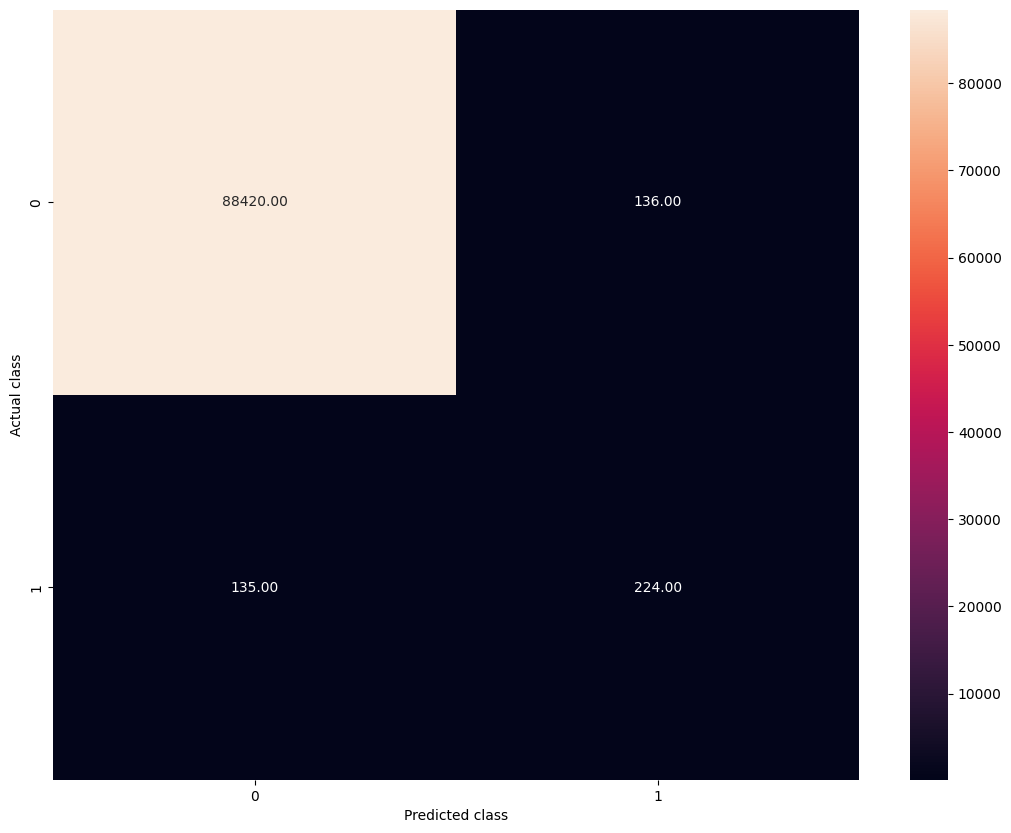

Precision Plot :


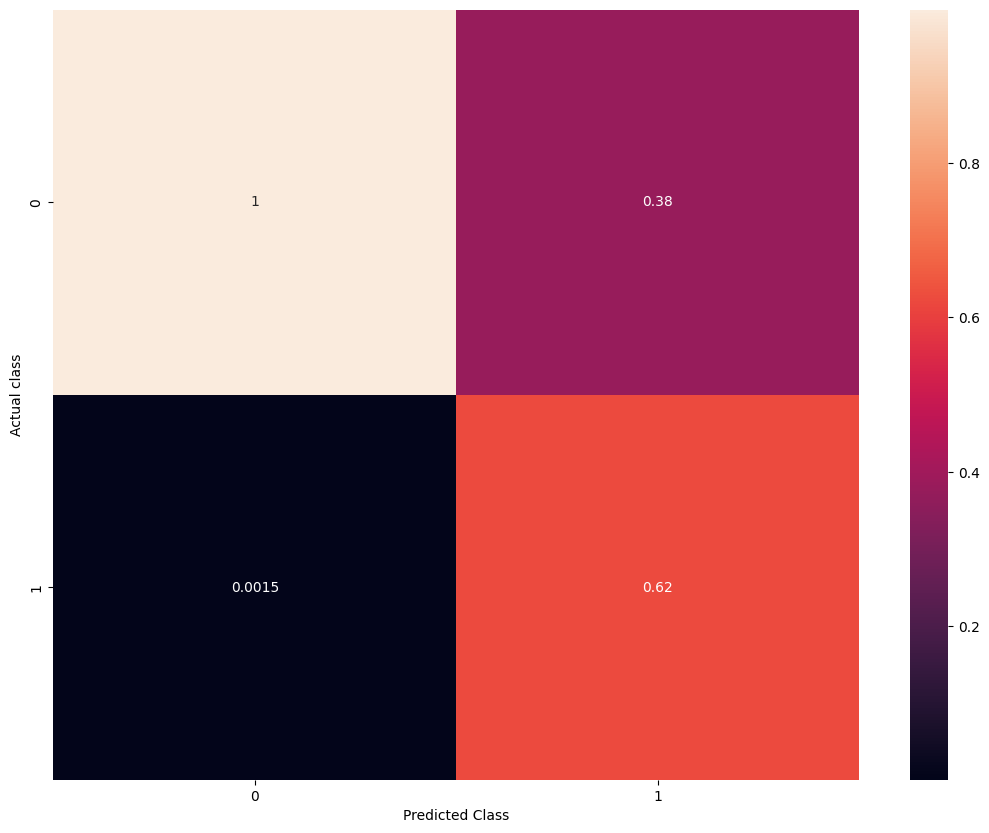

In [16]:
confusion_precision_plot(y_cv, predict_dtc)

In [17]:
perm_imp(x_cv, y_cv, dtc)

Weight,Feature
0.0262 ± 0.0007,amt
0.0249 ± 0.0006,category
0.0033 ± 0.0003,Unnamed: 0
0.0031 ± 0.0002,trans_date_trans_time
0.0011 ± 0.0001,merch_long
0.0011 ± 0.0002,dob
0.0006 ± 0.0001,merch_lat
0.0005 ± 0.0001,unix_time
0.0004 ± 0.0001,zip
0.0004 ± 0.0001,city_pop


# Testing 'rfc' with our test data

In [18]:
rfc.score(x_test,y_test)

0.998263513999856

In [19]:
predict_RFC = rfc.predict(x_test)
print(classification_report(y_test, predict_RFC))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110736
           1       0.93      0.57      0.71       408

    accuracy                           1.00    111144
   macro avg       0.97      0.78      0.85    111144
weighted avg       1.00      1.00      1.00    111144



Confusion Plot :


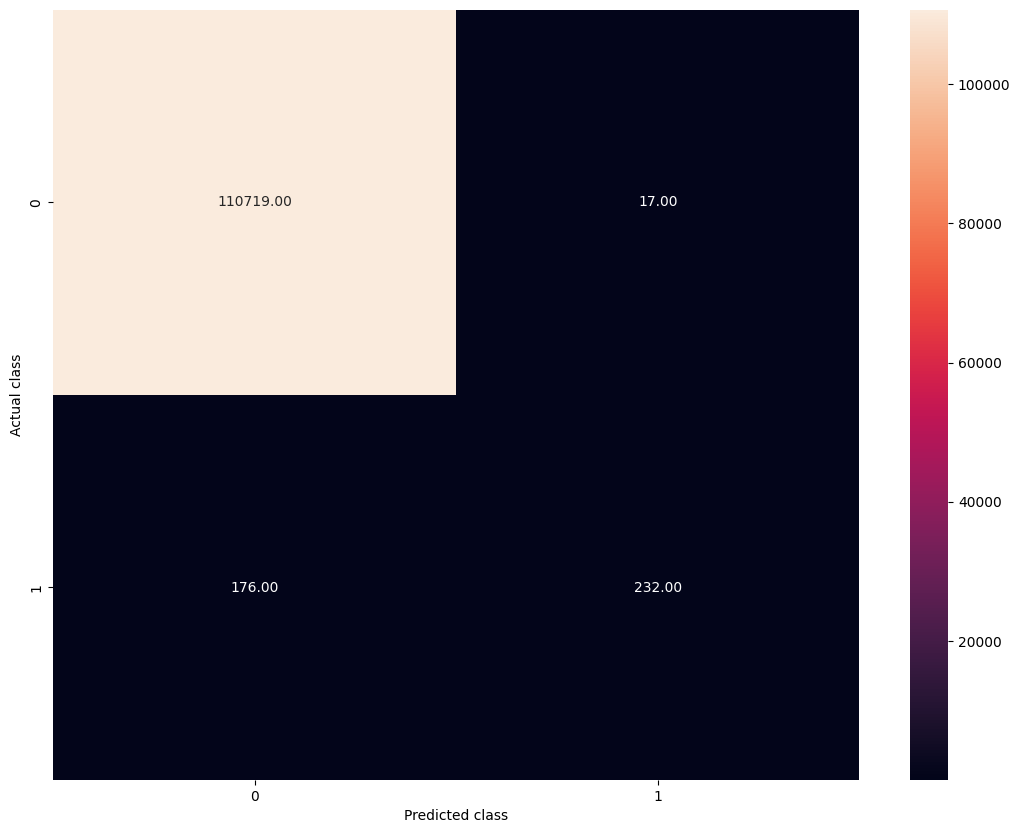

Precision Plot :


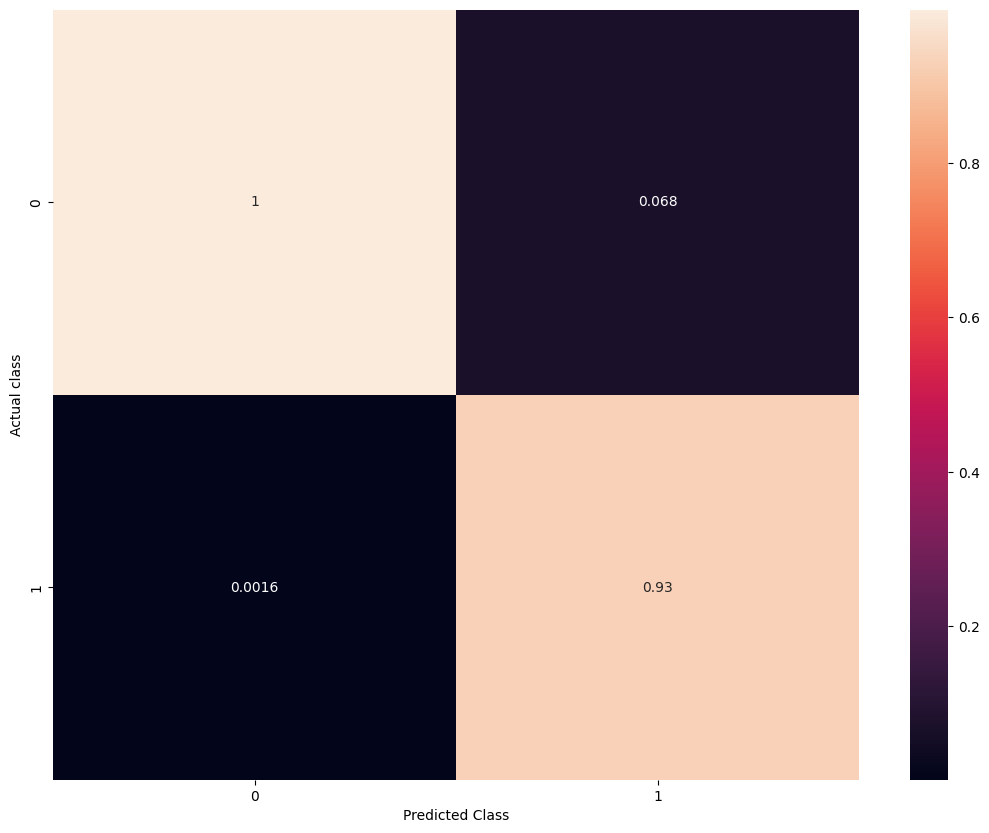

In [20]:
confusion_precision_plot(y_test, predict_RFC)

In [21]:
perm_imp(x_test,y_test,rfc)

Weight,Feature
0.0034 ± 0.0003,amt
0.0019 ± 0.0002,category
0.0006 ± 0.0001,Unnamed: 0
0.0004 ± 0.0000,dob
0.0003 ± 0.0001,city_pop
0.0002 ± 0.0001,unix_time
0.0002 ± 0.0001,last
0.0002 ± 0.0000,city
0.0002 ± 0.0000,job
0.0002 ± 0.0001,zip
